# Assignment 05 - [30 points] Solutions

## <u>Case Study</u>: Wine Dataset Analysis

Suppose that you are chemist who is interested in studying the properties of different types of wine. The data contained in the wine.csv file contains the results of a chemical analysis of 178 types of wines grown in the same region in Italy but derived from three different cultivars. The cultivar is listed in the 'Wine Class' column. The analysis determined the numerical quantities of 13 constituents found in each of the three types of wines.

For *this* case study, the goal of our cluster analysis is to find the larger naturally occuring clusters in the dataset and learn more about them. *If* we find that there are outliers and noise in this dataset, then it is ok to identify them as such and leave them out of the clusters. However, if a point is not *actually* noise or an outlier, we would like for it to be considered as part of a cluster in our final clustering.

https://archive.ics.uci.edu/ml/datasets/wine

### <u>Research Questions</u>:

We would like to answer the following research questions about the dataset.
* Is this dataset clusterable? If so, how many, what are their shapes and sizes (ie. number of objects in them), and are they well-separated?
* How far apart are these clusters? Are they cohesive?
* How do these clusters associate with the wine class labels (ie. the three cultivars)? How homogeneous are the clusters with respect to the wine class labels? To what extent are the wine classes completely together in the clusters that are naturally occuring in this dataset?
* Are there noise and outliers in this dataset?
* Which clustering algorithm will be most useful in identifying the naturally occuring large clusters in the dataset?


<hr style="height:1px;border:none;color:#333;background-color:#333;" />

### Imports

In [26]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import seaborn as sns
from sklearn.metrics import adjusted_rand_score, silhouette_samples, silhouette_score, calinski_harabasz_score
from pyclustertend import hopkins
from sklearn.manifold import TSNE
from sklearn.cluster import KMeans
from sklearn.cluster import AgglomerativeClustering
from scipy.spatial.distance import pdist
from scipy.cluster.hierarchy import linkage, dendrogram
from sklearn.preprocessing import StandardScaler
from sklearn.metrics.pairwise import pairwise_distances
from sklearn.neighbors import NearestNeighbors
from sklearn.cluster import DBSCAN
import warnings
warnings.filterwarnings("ignore", category=DeprecationWarning)
%matplotlib inline

## 1. [0.5 pt] Data Pre-Processing 

This dataset does not have any missing values.

* Read the wine.csv into a dataframe.
* Create another dataframe that contains the scaled numerical variables.
* Create another dataframe that contains the scaled numerical variables and the seed class labels.

You should scale the variables by mean subtracting and dividing by the standard deviation).

In [8]:
df = pd.read_csv('wine.csv')

In [9]:
df.head(3)

,Wine Class,Alcohol Content,Malic Acid,Ash,Alcalinity of Ash,Magnesium,Total Phenols,Flavanoids,Nonflavanoid Phenols,Proanthocyanins,Color Intensity,Hue,OD280 or OD315 of diluted wines,Proline
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185


In [10]:
scaled_array=StandardScaler().fit_transform(df.loc[:, ~df.columns.str.contains('Wine Class')])
scaled_array[:2]

array([[ 1.51861254, -0.5622498 ,  0.23205254, -1.16959318,  1.91390522,
         0.80899739,  1.03481896, -0.65956311,  1.22488398,  0.25171685,
         0.36217728,  1.84791957,  1.01300893],
       [ 0.24628963, -0.49941338, -0.82799632, -2.49084714,  0.01814502,
         0.56864766,  0.73362894, -0.82071924, -0.54472099, -0.29332133,
         0.40605066,  1.1134493 ,  0.96524152]])

In [11]:
df_stand = pd.DataFrame(scaled_array, columns= df.columns[1:])
df_stand['Wine_Class'] = df['Wine Class']
df_stand.head(3)

,Alcohol Content,Malic Acid,Ash,Alcalinity of Ash,Magnesium,Total Phenols,Flavanoids,Nonflavanoid Phenols,Proanthocyanins,Color Intensity,Hue,OD280 or OD315 of diluted wines,Proline,Wine_Class
0,1.518613,-0.562250,0.232053,-1.169593,1.913905,0.808997,1.034819,-0.659563,1.224884,0.251717,0.362177,1.847920,1.013009,1
1,0.246290,-0.499413,-0.827996,-2.490847,0.018145,0.568648,0.733629,-0.820719,-0.544721,-0.293321,0.406051,1.113449,0.965242,1
2,0.196879,0.021231,1.109334,-0.268738,0.088358,0.808997,1.215533,-0.498407,2.135968,0.269020,0.318304,0.788587,1.395148,1


## 2. Clusterability

### 2.1. [0.5 pt] t-SNE Plots
Using 6 different perplexity values and at least two random states for each perplexity value, map this dataset onto a two-dimensional dataset with the t-SNE algorithm. Show your projected coordinates in a scatterplot for each combination of random states and perplexity value. Also, color code your points by the Wine Class labels.

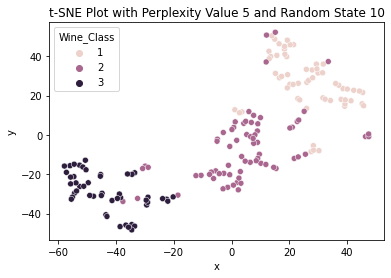

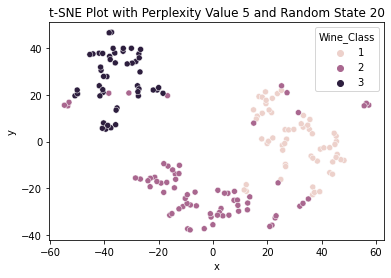

--------------------------------------------


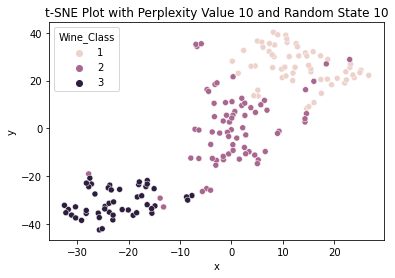

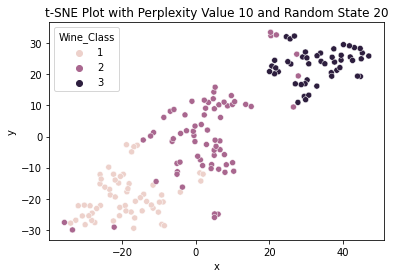

--------------------------------------------


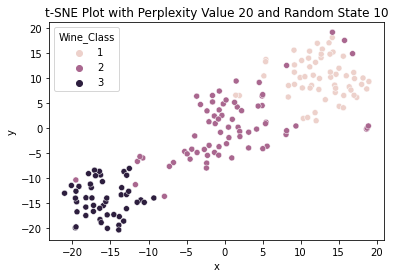

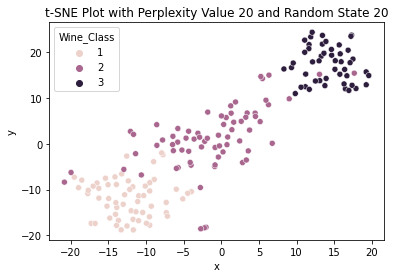

--------------------------------------------


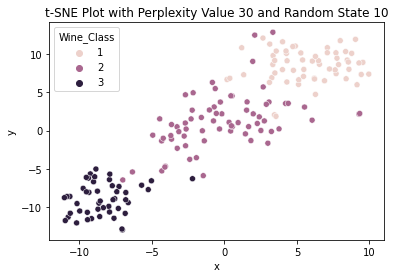

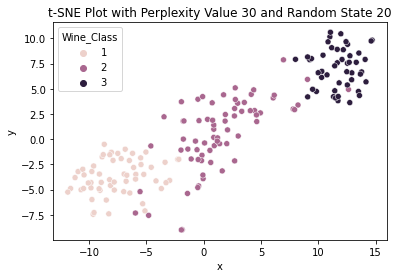

--------------------------------------------


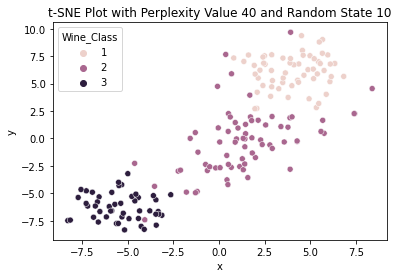

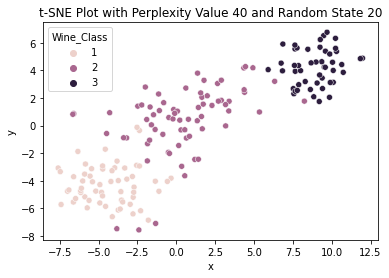

--------------------------------------------


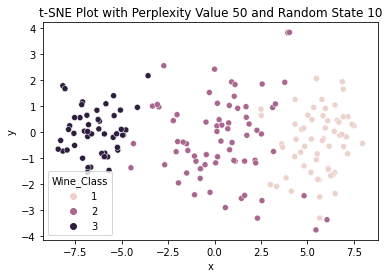

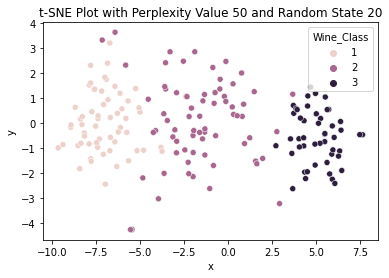

--------------------------------------------


In [13]:
for perp in [5,10, 20, 30, 40, 50]:
    for rs in [10,20]:
        tsne = TSNE(n_components=2, perplexity=perp, random_state=rs)
        data_tsne = tsne.fit_transform(df_stand.iloc[:, :-2])
        df_tsne = pd.DataFrame(data_tsne, columns=['x', 'y'])
        df_combo = pd.concat([df_stand.Wine_Class, df_tsne], axis=1)
        sns.scatterplot(x='x',y='y', hue='Wine_Class', data=df_combo)
        plt.title('t-SNE Plot with Perplexity Value %s and Random State %s' %(perp, rs))
        plt.show()
    print('--------------------------------------------')

### 2.2. [1.5 pt] Interpretation:

Use your t-SNE plots to answer the following questions.

1. Is this dataset clusterable?
2. If so, how many clusters are in this dataset?
3. What is the shape of the clusters in this dataset?
4. Are these clusters well separated?
5. Are these clusters balanced in size?
6. Describe the relationship between the clusters suggested by the t-SNE plots and the wine classes.

Finally, pick out a random state and perplexity value that reflects the answers to your questions and show the corresponding t-SNE plot below.

1. The clusters seem very sparse with noise. There is no clear separation as well. Hence, it will not get clustered perfectly.

2. There are three clusters.

3. The shape of the clusters seem random (no specific shape)

4. These clusters are not well separated since many objects from class 2 overlap with class 1 and class 3.

5. Yes, clusters are balanced in size.

6. Three clusters suggested by t-SNE and wine classes match. There is however no clear separation, but we can see that there are three clusters where objects are surrounded except for class 2 where some of its object overlap with other clusters.

## 3. Dataset Noise Assessment

### 3.1. [1.5 pt] Nearest Neighbor Distance Plots

For your scaled dataset, create the following 4 plots:
* k=2 nearest neighbor sorted distance plot,
* k=3 nearest neighbor sorted distance plot,
* k=4 nearest neighbor sorted distance plot,
* k=5 nearest neighbor sorted distance plot.

See DBSCAN application notes for code assistance.

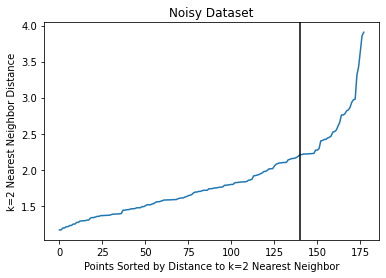

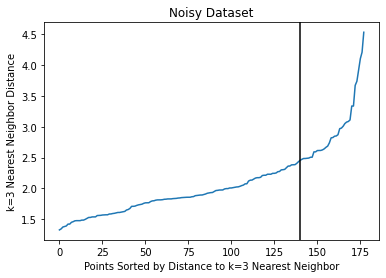

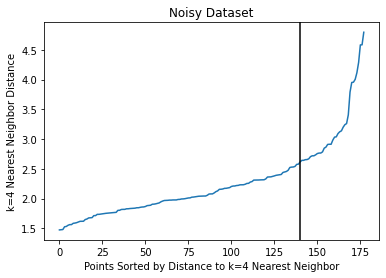

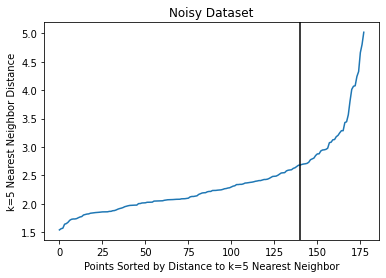

In [20]:
#Find the distance of the kth nearest neighbor
X = df_stand.iloc[:, :-1]
for k in range(2,6):
    nbrs = NearestNeighbors(n_neighbors=k, algorithm='ball_tree').fit(X)
    distances, indices = nbrs.kneighbors(X)

    plt.plot(np.sort(distances.T[k-1]))
    plt.axvline(x=140, color='black')
    plt.xlabel('Points Sorted by Distance to k=%s Nearest Neighbor'%k)
    plt.ylabel('k=%s Nearest Neighbor Distance'%k)
    plt.title('Noisy Dataset')
    plt.show()

### 3.2. [1.5 pt] Noise Assessment

Based on these plots above, would you say that your dataset has a lot of noise? Explain.

> From above plots, we can see that there is a lot of noise.

> The slope of the curve starts increasing sharply after ~140 points. This shows that there are many points which have high nearest neibhbor distance.

## 4. Clustering Algorithm Selection

### 4.1. DBSCAN - Parameter Selection and Algorithm Fit

We would like to try to use DBSCAN to cluster this dataset, but first we need to determine the best parameter values for $\epsilon$ and $minpts$. For *this* case study, the goal of our cluster analysis is to find the naturally occuring clusters in the dataset and learn more about them. It is ok if not all points, whether they be outliers or noise are not included in the final clustering. But if we have a strong indication that there are not a lot of noise and outliers, then we should not expect to see too many points labeled as such in our result.

#### 4.1.1.  [3 pt] t-SNE Plots

Try to find a pair of $minpts$ and $epsilon$ values for which DBSCAN will mostly identify the main k clusters suggested by the t-SNE plots and have very few noise points. If you are unable to find a pair of parameter values that can do this, explain why this might have happened.

<u>Hint</u>: *To test this out, you should try out many different combinations of minpts and epsilon values. Try out $minpts\in[2,3,4,5]$ and many values of $\epsilon$ in the range $[1.5,4.5]$.*

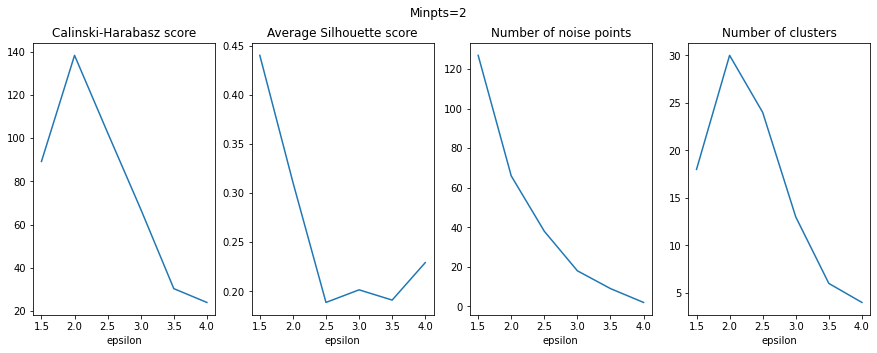

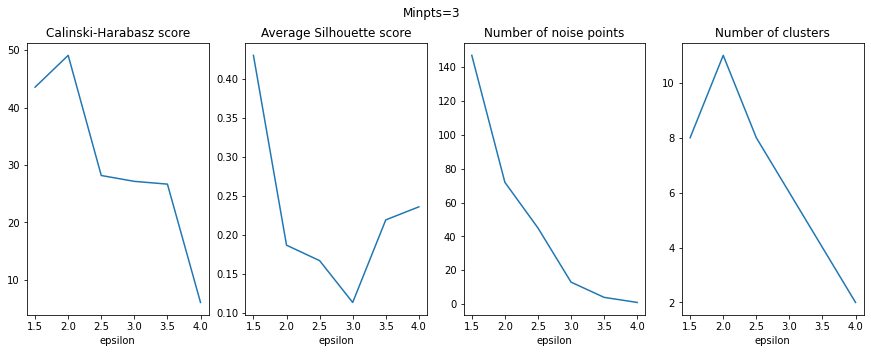

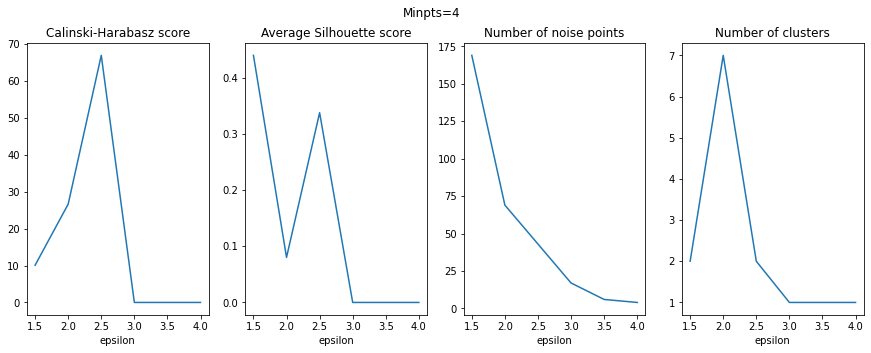

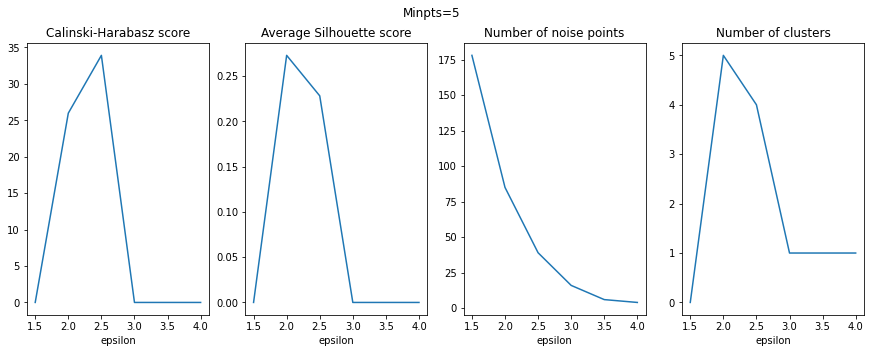

In [27]:
# Perform the preliminary analysis
df_noisy = X
for minpts in [2,3,4,5]:
    calinski_harabazs_scores = []
    silhouette_scores = []
    num_clusters = []
    num_noise_points = []


    num_clusters_p = []
    n_noise_points_p = []
    silhouette_scores_p = []
    calinski_harabazs_scores_p = []

    for eps in np.arange(1.5, 4.5, 0.5):
        #Cluster the dataset using DBSCAN
        dst = DBSCAN(eps=eps, min_samples=minpts, metric='euclidean')
        df_noisy['predicted_cluster'] = dst.fit_predict(X)

        #Filter out the noise points
        df_noisy_no_noise=df_noisy[df_noisy['predicted_cluster']!=-1]
        
        #Get the number of clusters in the clustering
        k=len(df_noisy['predicted_cluster'].value_counts())-1
        num_clusters.append(k)
        
        #Get the number of noise points
        noise_point_num=len(df_noisy[df_noisy['predicted_cluster']==-1])
        num_noise_points.append(noise_point_num)
        
        #Average silhouette score of the clustering
        if k>1:
            silhouette_scores.append(silhouette_score(X_noisy[df_noisy['predicted_cluster']!=-1],
                                                              df_noisy[df_noisy['predicted_cluster']!=-1]['predicted_cluster']))
        else:
            #(If there is only one cluster, then the average silhouette score is 0)
            silhouette_scores.append(0)
        #Calinski-Harabasz score of the clsutering
        if k>1:
            calinski_harabazs_scores.append(calinski_harabasz_score(X_noisy[df_noisy['predicted_cluster']!=-1],
                                                                        df_noisy[df_noisy['predicted_cluster']!=-1]['predicted_cluster']))
        else:
            calinski_harabazs_scores.append(0)
        
    # Show the results of the preliminary analysis
    fig, ax = plt.subplots(1, 4, figsize=(15, 5), sharex=True)

    eps = np.arange(1.5, 4.5, 0.5)
    fig.suptitle('Minpts=%s'%minpts)
    ax[0].plot(eps, calinski_harabazs_scores)
    ax[1].plot(eps, silhouette_scores)    
    ax[2].plot(eps, num_noise_points)
    ax[3].plot(eps, num_clusters)

    ax[0].set_title('Calinski-Harabasz score')
    ax[1].set_title('Average Silhouette score')
    ax[2].set_title('Number of noise points')
    ax[3].set_title('Number of clusters')

    #ax[0].set_yticks(np.arange(5, 60, 7))
    ax[0].set_xlabel('epsilon')
    ax[1].set_xlabel('epsilon')
    ax[2].set_xlabel('epsilon')
    ax[3].set_xlabel('epsilon')
    plt.show()

### 4.2.  [1 pt] k-Means: Algorithm Fit

List three reasons why this dataset might be a good fit for k-means (aside from the fact that this is a numerical dataset).

### 4.3. k-Means Clustering

#### 4.3.1.  [1 pt] Cluster the data

Cluster this dataset into the number of clusters that your t-SNE plots are suggesting. Then color code your clustering results on your t-SNE plot. Use a random state of 100.

#### 4.3.2 [1 pt] Interpretation:

For *this* case study, one of the goals of our cluster analysis is to find larger, naturally occuring clusters in the dataset and learn more about them. How well did k-means do in meeting this goal? Explain.

## 5. Post k-Means Cluster Analysis

### 5.1.Cluster Sorted Similarity Matrix

#### 5.1.1. [2 pt] Create it
Create a cluster sorted similarity matrix for this k-means clustering and your scaled dataset.

#### 5.1.2. [2 pt] Interpretation

Use this cluster sorted distance matrix to answer the following questions.

1. Which two clusters are furthest part? Explain.
2. Which cluster has the worst overall cohesion? Explain.

### 5.2. Cluster Sorted Similarity Matrix Correlation

#### 5.2.1. [1 pt] Calculate correlation coefficient
Scale this clustered sorted similarity matrix (using the method we discussed in class) and calculate the correlation of this scaled matrix to the "ideal" scaled cluster sorted similarity matrix which has the same number of clusters and the same number of objects within each of these clusters.

#### 5.2.2. [1 pt] Interpretation

Does this correlation coefficient suggest that this clustering has a very *high* amount of cohesion and separation? Explain.

### 5.3 Pre-Assigned Class Label Association

#### 5.3.1. [1 pt] Homogeneity and Completeness
Calculate the homogeneity score, the completeness score, and the V-score between the Wine Class labels and the k-means clustering.

#### 5.3.2. [1 pt] Interpretation

1. Interpret your homogeneity score and your completeness score.

2. In your t-SNE plot, color code the points by the k-means cluster labels and code the shape of points by the wine class labels. Does the homogeneity score and the completeness score that you just calculated agree with what you see in this t-SNE plot? Explain.